# E-Commerce

In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in files
xls = pd.ExcelFile('commerce.xlsx')
data = pd.read_excel(xls, 'Sales')

In [3]:
#Average Revenue per user
data['arpu'] = data.Sales/data.Customers
#Average Revenue per transaction
data['arpt'] = data.Sales/data.Transactions
#Monthly Revenue Growth
mshift = ((data.Sales - data.groupby(['Company']).Sales.shift(1))/data.groupby(['Company']).Sales.shift(1))*100
data['mom_rev_growth'] = np.where(((mshift == np.inf)|(mshift == -np.inf)), np.nan, mshift)
#Annual Revenue Growth
yshift = ((data.Sales - data.groupby(['Company']).Sales.shift(12))/data.groupby(['Company']).Sales.shift(12))*100
data['yoy_rev_growth'] = np.where(((yshift == np.inf)|(yshift == -np.inf)), np.nan, yshift)
#Monthly User Growth
mushift = ((data.Customers - data.groupby(['Company']).Customers.shift(1))/data.groupby(['Company']).Customers.shift(1))*100
data['mom_user_growth'] = np.where(((mushift == np.inf)|(mushift == -np.inf)), np.nan, mushift)
#Annual User Growth
yushift = ((data.Customers - data.groupby(['Company']).Customers.shift(12))/data.groupby(['Company']).Customers.shift(12))*100
data['yoy_user_growth'] = np.where(((yushift == np.inf)|(yushift == -np.inf)), np.nan, yushift)
#Monthly Transaction Growth
mtshift = ((data.Transactions - data.groupby(['Company']).Transactions.shift(1))/data.groupby(['Company']).Transactions.shift(1))*100
data['mom_trans_growth'] = np.where(((mtshift == np.inf)|(mtshift == -np.inf)), np.nan, mtshift)

In [4]:
# #Make Copy and remove empty rows to get min date
data_copy = data.copy()
data_copy = data[(data.Sales != 0) &(data.Customers != 0) &(data.Transactions != 0)]
#Create company start date column
start_date_dict = data_copy.groupby(['Company']).Month.min().to_dict()
data['start_date'] = data['Company'].map(start_date_dict)
data['yrs_in_business'] = (data.Month - data.start_date).dt.days//365
data = data[~data.yrs_in_business < 0]

In [5]:
data[data.isnull().any(axis=1)]

,Company,Month,Sales,Customers,Transactions,arpu,arpt,mom_rev_growth,yoy_rev_growth,mom_user_growth,yoy_user_growth,mom_trans_growth,start_date,yrs_in_business
19,Blue Apron,2012-08-01,56,1,1,56.000000,56.000000,NaN,NaN,NaN,NaN,NaN,2012-08-01,0
20,Blue Apron,2012-09-01,845,4,13,211.250000,65.000000,1408.928571,NaN,300.000000,NaN,1200.000000,2012-08-01,0
21,Blue Apron,2012-10-01,2192,13,34,168.615385,64.470588,159.408284,NaN,225.000000,NaN,161.538462,2012-08-01,0
22,Blue Apron,2012-11-01,2468,20,41,123.400000,60.195122,12.591241,NaN,53.846154,NaN,20.588235,2012-08-01,0
23,Blue Apron,2012-12-01,2789,24,43,116.208333,64.860465,13.006483,NaN,20.000000,NaN,4.878049,2012-08-01,0
24,Blue Apron,2013-01-01,6406,45,105,142.355556,61.009524,129.688060,NaN,87.500000,NaN,144.186047,2012-08-01,0
25,Blue Apron,2013-02-01,9494,73,158,130.054795,60.088608,48.204808,NaN,62.222222,NaN,50.476190,2012-08-01,0
26,Blue Apron,2013-03-01,22207,146,368,152.102740,60.345109,133.905625,NaN,100.000000,NaN,132.911392,2012-08-01,0
27,Blue Apron,2013-04-01,30103,201,488,149.766169,61.686475,35.556356,NaN,37.671233,NaN,32.608696,2012-08-01,0
28,Blue Apron,2013-05-01,31581,217,511,145.534562,61.802348,4.909810,NaN,7.960199,NaN,4.713115,2012-08-01,0


### Month over Month Growth

In [6]:
# Average Month over Month Revenue Growth
data.groupby(['Company','yrs_in_business'])['mom_rev_growth'].mean()

Company            yrs_in_business
Blue Apron         0                   179.699948
                   1                    22.647172
                   2                    15.396437
                   3                     7.534135
                   4                     0.331564
                   5                    -2.684096
                   6                     4.612633
Brandless          0                     9.928106
                   1                    14.516369
Chewy              0                    32.837809
                   1                  1181.970151
                   2                     9.235751
                   3                     6.181123
                   4                     6.331347
                   5                     6.550637
                   6                     4.776909
                   7                     1.111885
Dollar Shave Club  0                  3562.801359
                   1                    12.660304
               

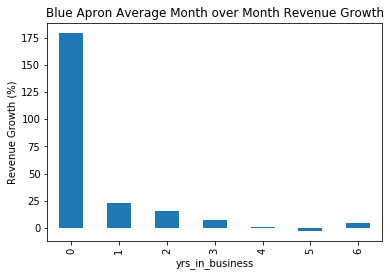

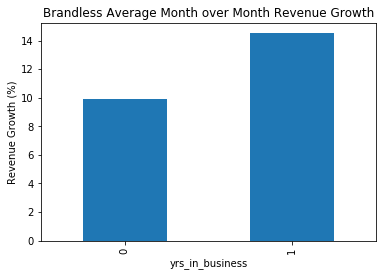

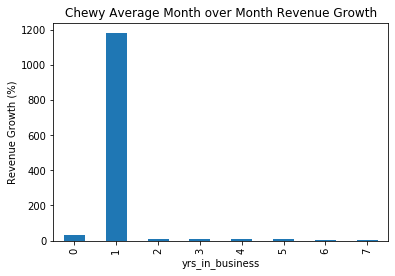

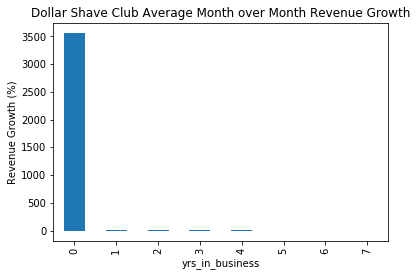

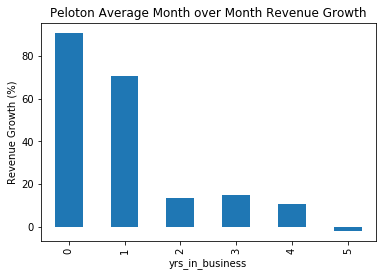

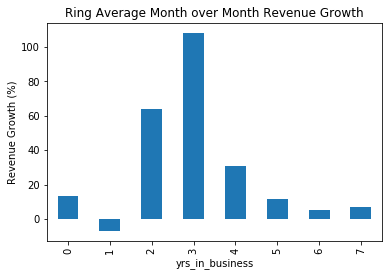

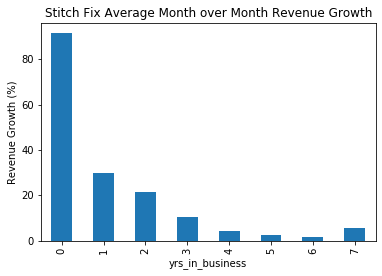

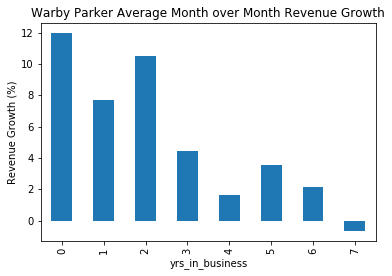

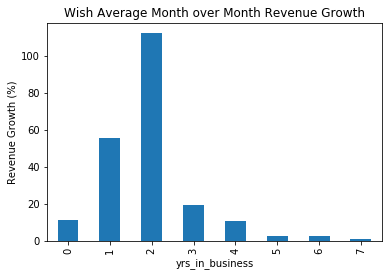

In [7]:
for x in data.Company.unique():
    data.groupby(['Company','yrs_in_business'])['mom_rev_growth'].mean()[x].plot.bar()
    plt.title(x + ' Average Month over Month Revenue Growth')
    plt.ylabel('Revenue Growth (%)')
    plt.show()

In [8]:
# Average Month over Month User Growth
data.groupby(['Company','yrs_in_business'])['mom_user_growth'].mean()

Company            yrs_in_business
Blue Apron         0                    84.570862
                   1                    19.179122
                   2                    13.212199
                   3                     6.528857
                   4                     0.190784
                   5                    -2.564691
                   6                     0.237204
Brandless          0                    11.210231
                   1                    13.290353
Chewy              0                    20.306638
                   1                  1122.686853
                   2                     9.122400
                   3                     5.698158
                   4                     6.373210
                   5                     6.616440
                   6                     4.085040
                   7                     2.414552
Dollar Shave Club  0                  4360.830288
                   1                    10.341306
               

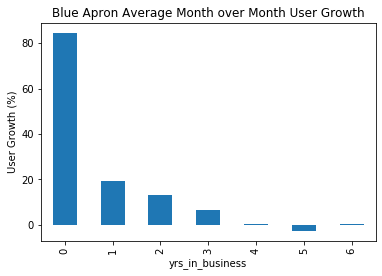

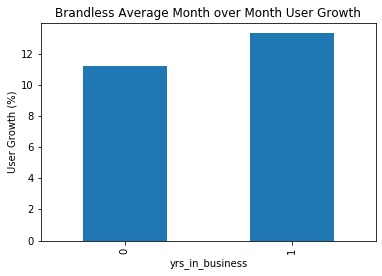

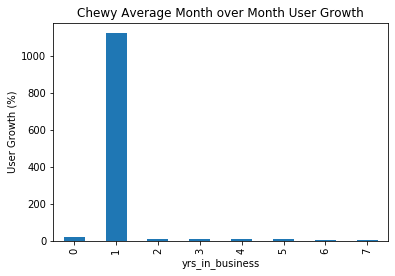

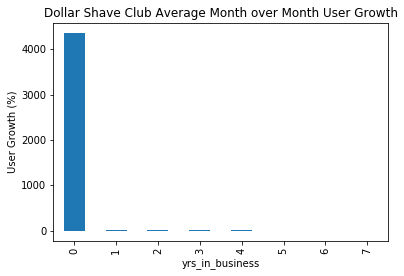

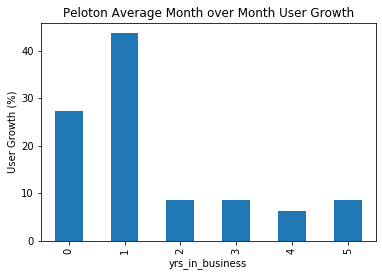

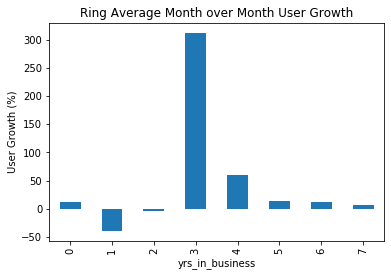

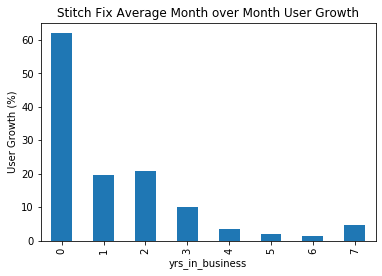

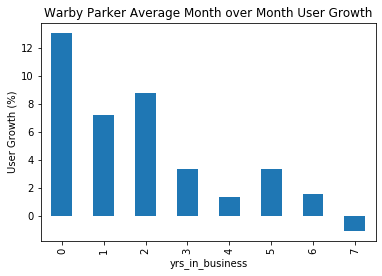

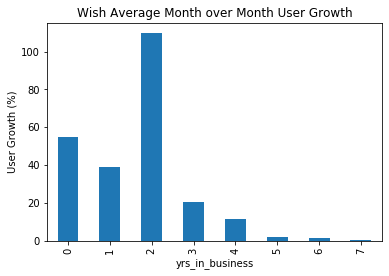

In [9]:
for x in data.Company.unique():
    data.groupby(['Company','yrs_in_business'])['mom_user_growth'].mean()[x].plot.bar()
    plt.title(x + ' Average Month over Month User Growth')
    plt.ylabel('User Growth (%)')
    plt.show()

 All companies have experience explosive growth (in terms of Sales and Users) in the first 3 years of doing business and growth starts to slow after years 5 and 6. Keep in mind, a 6% average month over month growth will double your revenues in one year, and a -6% average month over month decline will halve your revenues in one year. All companies in our observation have exceeded doubling of revenues, every year, in the first three years of doing business with the exception of Brandless (still young) and Ring (had a tough 2nd and 3rd year but experienced explosive growth thereafter). 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

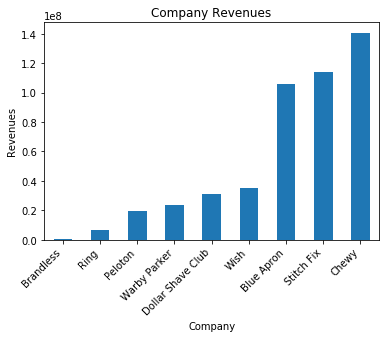

In [10]:
data.groupby('Company').Sales.sum().sort_values().plot.bar()
plt.title('Company Revenues')
plt.ylabel('Revenues')
plt.xticks(rotation=45, ha='right')

### High Retention

In [11]:
#read in tabs
blueapron = pd.read_excel(xls, 'Blue Apron')
brandless = pd.read_excel(xls, 'Brandless')
chewy = pd.read_excel(xls, 'Chewy')
dsc = pd.read_excel(xls, 'DSC')
peloton = pd.read_excel(xls, 'Peloton')
ring = pd.read_excel(xls, 'Ring')
sfix = pd.read_excel(xls, 'Stitch Fix')
wp = pd.read_excel(xls, 'Warby Parker')
wish = pd.read_excel(xls, 'Wish')

In [12]:
#create title to merge to calculate churn and ltv
blueapron['Company'] = 'Blue Apron'
brandless['Company'] = 'Brandless'
chewy['Company'] = 'Chewy'
dsc['Company'] = 'Dollar Shave Club'
peloton['Company'] = 'Peloton'
ring['Company'] = 'Ring'
sfix['Company'] = 'Stitch Fix'
wp['Company'] = 'Warby Parker'
wish['Company'] = 'Wish'

In [13]:
#take necessary columns
y = [blueapron[['Cohort month','Cohort size','Company']],
     brandless[['Cohort month','Cohort size','Company']],
     chewy[['Cohort month','Cohort size','Company']], 
     dsc[['Cohort month','Cohort size','Company']], 
     peloton[['Cohort month','Cohort size','Company']], 
     ring[['Cohort month','Cohort size','Company']], 
     sfix[['Cohort month','Cohort size','Company']], 
     wp[['Cohort month','Cohort size','Company']], 
     wish[['Cohort month','Cohort size','Company']]]

cohort = pd.concat(y)

In [14]:
#merge
dataco = pd.merge(data, cohort, how = 'left', left_on = ['Company', 'Month'], right_on = ['Company','Cohort month'])\
                                                                        .drop('Cohort month', axis =1)

In [15]:
#rename columns
dataco.rename(columns= {'Cohort size': 'useradd'}, inplace = True)
dataco.rename(columns= {'Customers': 'end_num_users'}, inplace = True)

In [16]:
#Churn Column
dataco['userchurn'] = dataco.useradd + dataco.groupby(['Company']).end_num_users.shift(1)- dataco.end_num_users

#Users at beg of month
dataco['start_num_users'] = dataco.groupby(['Company']).end_num_users.shift(1)

#Monthly Churn Rate
dataco['mo_churn_rate'] = (dataco.userchurn/(dataco.start_num_users + dataco.useradd))*100
dataco.loc[dataco.mo_churn_rate < 0, 'mo_churn_rate'] = 0
dataco = dataco.replace([np.inf, -np.inf], np.nan)

In [17]:
dataco.groupby('Company').mo_churn_rate.mean()

Company
Blue Apron           13.834027
Brandless            37.842149
Chewy                13.854973
Dollar Shave Club     8.973266
Peloton              16.559297
Ring                 30.847498
Stitch Fix           15.751962
Warby Parker         39.994123
Wish                 32.812815
Name: mo_churn_rate, dtype: float64

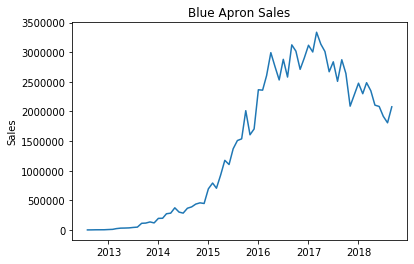

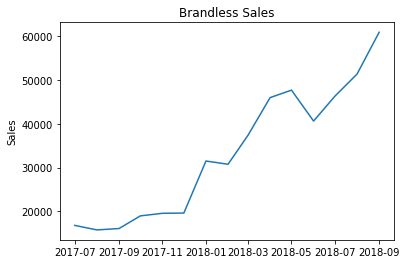

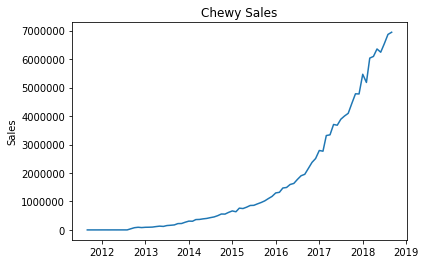

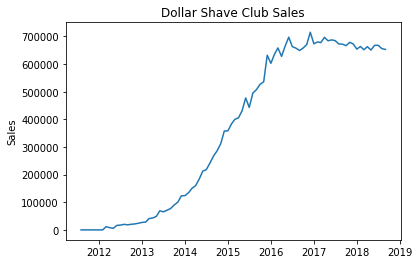

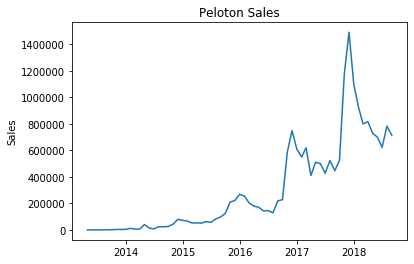

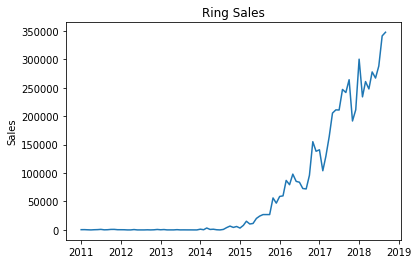

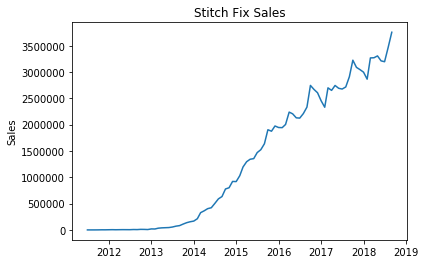

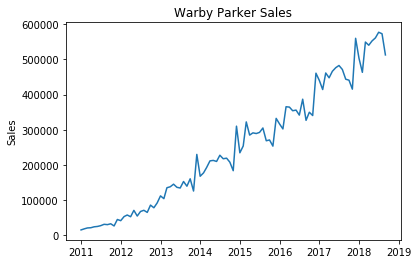

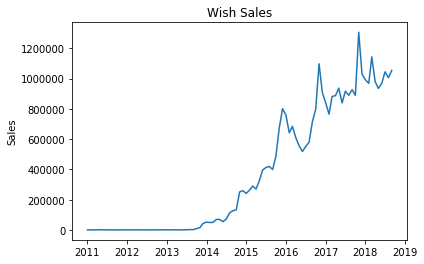

In [18]:
for x in data.Company.unique():
    plt.plot(dataco[dataco.Company == x]['Month'], dataco[dataco.Company == x]['Sales'])
    plt.title(x + ' Sales')
    plt.ylabel('Sales')
    plt.show()

In [19]:
#Life of a Customer
life = (1/(dataco.mo_churn_rate/100))
dataco['life'] = np.where(((life == np.inf)|(life == -np.inf)), np.nan, life)

#Lifetime Value of a Customer
ltv = (1/(dataco.mo_churn_rate/100))*dataco.arpu
dataco['ltv'] =np.where(((ltv == np.inf)|(ltv == -np.inf)), np.nan, ltv)

In [20]:
#Fill in missing values
arpu_dict = dataco.groupby('Company')['arpu'].mean().to_dict()
arpt_dict = dataco.groupby('Company')['arpt'].mean().to_dict()
dataco.loc[(dataco.arpu.isnull()), 'arpu'] = dataco[dataco.arpu.isnull()].Company.map(arpu_dict)
dataco.loc[(dataco.arpt.isnull()), 'arpt']= dataco[dataco.arpt.isnull()].Company.map(arpt_dict)
dataco = dataco.fillna(0)

In [21]:
#Grouped by Company and Years in Business
dataco.groupby(['Company','yrs_in_business']).agg({'ltv':['mean'],
                                                    'life':['mean'],
                                                    'mo_churn_rate':['mean'],
                                                    'mom_rev_growth':['mean'],
                                                   'mom_user_growth':['mean'],
                                                    'arpu':['mean'],
                                                    'arpt':['mean'],
                                                   'useradd':['mean'],
                                                   'Company':['count']})

ltv        life mo_churn_rate  \
                                          mean        mean          mean   
Company           yrs_in_business                                          
Blue Apron        0                1033.184630    7.522580      9.184828   
                  1                1195.833528    7.965056     15.488646   
                  2                1029.291598    7.203003     14.452220   
                  3                1142.570764    7.454444     14.321228   
                  4                 909.592091    6.292607     16.274931   
                  5                1199.817849    8.386001     12.786800   
                  6                1913.446521   13.078787      9.890074   
Brandless         0                 105.977323    2.477366     35.666265   
                  1                 127.330137    2.962624     33.931634   
Chewy             0                 175.007440    2.361111     22.355006   
                  1                 496.515088    5.621010     16.579951   
                  2                 574.042779    6.514254     16.112929   
                  3                 847.598921    9.286682     11.962294   
                  4                 901.988037    9.744509     10.526881   
                  5                 968.478494   10.594825     10.084000   
                  6                1227.498108   12.944774      8.624709   
                  7                1071.222167   11.275872      8.868494   
Dollar Shave Club 0                 994.766890  146.929539     33.129537   
                  1                  95.227314   13.573090      7.546242   
                  2                 146.319268   17.604659      5.995550   
                  3                 181.123951   20.367914      5.408847   
                  4                 261.389483   27.604276      4.233473   
                  5                 285.159059   29.046765      3.714050   
                  6                 435.247563   43.495719      2.996368   
                  7                 316.723133   31.158483      3.219405   
Peloton           0                 569.417276    1.689881     32.182401   
                  1                1388.499952    4.363740     20.232596   
                  2                2151.550769    7.144190     15.180309   
                  3                3025.938913   10.270897     10.491651   
                  4                3790.636572   15.089782      7.532930   
                  5                4847.565648   34.943309      3.159405   
Ring              0                 421.027778    1.458333     34.722222   
                  1                 125.916667    0.666667     31.944444   
                  2                  55.500000    0.708333     26.388889   
                  3                 933.852899    3.937346     41.172275   
                  4                 318.305848    2.118292     35.091853   
                  5                 160.954764    3.712952     27.716136   
                  6                 160.616633    6.026670     18.013198   
                  7                 122.783031    7.194519     14.887958   
Stitch Fix        0                 279.199691    4.308753     21.081754   
                  1                 603.935082    6.420601     22.317581   
                  2                 536.755688    5.486902     18.709472   
                  3                 835.337900    7.575846     13.402834   
                  4                 894.959542    7.652404     13.494084   
                  5                1321.478418   10.444667     11.501157   
                  6                1381.374054   10.948400     10.462472   
                  7                1913.453668   14.877418      7.678840   
Warby Parker      0                 238.703912    2.055006     41.357858   
                  1                 280.846773    2.305605     43.905814   
                  2                 318.509316    2.456113     41.893888   
               

In [22]:
#Average relevant metrics 
df = dataco.groupby(['Company'])[['ltv','life','mo_churn_rate','mom_rev_growth','mom_user_growth','mom_trans_growth','arpu','arpt','Company']].mean().reset_index()
subscription = df.iloc[[0,3,4,6]]
non_subscription = df.iloc[[1,2,5,7,8]]
subscription['subscription'] = 'Subscription'
non_subscription['subscription'] = 'Non-Subscription'
pd.concat([subscription, non_subscription]).reset_index(drop = True).sort_values('ltv')

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Company,ltv,life,mo_churn_rate,mom_rev_growth,mom_user_growth,mom_trans_growth,arpu,arpt,subscription
4,Brandless,110.247886,2.574417,35.319339,10.183885,10.878906,10.886351,42.956918,38.233784,Non-Subscription
8,Wish,211.981068,3.710754,32.459989,27.288213,28.989296,34.466349,66.038763,48.025220,Non-Subscription
6,Ring,292.678950,3.099933,29.189030,27.053284,43.445547,46.631306,165.207730,157.284301,Non-Subscription
1,Dollar Shave Club,342.142426,42.392797,8.868926,418.903109,510.949323,476.951886,8.885025,8.304898,Subscription
7,Warby Parker,367.980423,2.537307,39.564079,5.223441,4.731785,5.066710,143.174735,126.202353,Non-Subscription
5,Chewy,745.467866,8.189198,13.691973,175.798574,165.656151,146.713313,87.741232,68.464726,Non-Subscription
3,Stitch Fix,873.297075,7.800955,15.570905,21.287092,15.810151,16.999327,105.229347,63.040398,Subscription
0,Blue Apron,1107.437548,7.622187,13.647081,33.846314,18.504178,31.347587,143.951065,61.303433,Subscription
2,Peloton,2390.005385,9.806437,16.049780,32.714177,16.751204,17.167392,299.579414,249.539990,Subscription


In [23]:
#Median Relevant Metrics
df = dataco.groupby(['Company'])[['ltv','life','mo_churn_rate','mom_rev_growth','mom_user_growth','mom_trans_growth','arpu','arpt','Company']].median().reset_index()
subscription = df.iloc[[0,3,4,6]]
non_subscription = df.iloc[[1,2,5,7,8]]
subscription['subscription'] = 'Subscription'
non_subscription['subscription'] = 'Non-Subscription'
pd.concat([subscription, non_subscription]).reset_index(drop = True).sort_values('ltv')

C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\mjdch\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Company,ltv,life,mo_churn_rate,mom_rev_growth,mom_user_growth,mom_trans_growth,arpu,arpt,subscription
4,Brandless,112.495898,2.614265,37.325456,3.718676,0.000000,0.199601,42.298387,38.007246,Non-Subscription
6,Ring,141.191966,2.315789,24.322231,0.000000,4.277829,3.773585,100.522388,90.842342,Non-Subscription
8,Wish,174.628351,3.507966,26.374745,2.519753,2.985612,2.035623,46.396505,25.041791,Non-Subscription
1,Dollar Shave Club,179.404623,19.723066,4.645797,2.578066,3.196166,3.225391,8.975512,8.382920,Subscription
7,Warby Parker,349.304586,2.517112,39.685143,1.108622,0.000000,0.742574,146.243664,128.123320,Non-Subscription
5,Chewy,736.680872,8.048444,11.523733,6.442216,6.009059,7.312529,90.392542,69.248896,Non-Subscription
3,Stitch Fix,807.890819,7.018779,13.807028,7.139488,6.528238,4.747005,111.320232,63.222133,Subscription
0,Blue Apron,993.554876,7.004945,14.195019,7.238835,7.170795,6.340083,145.536094,61.186982,Subscription
2,Peloton,2005.009690,7.262712,12.654746,0.000000,7.673716,7.386577,261.988905,226.431743,Subscription


In [24]:
df_sub = pd.concat([subscription, non_subscription]).reset_index(drop = True).sort_values('ltv')
df_sub.groupby('subscription').mean()

,ltv,life,mo_churn_rate,mom_rev_growth,mom_user_growth,mom_trans_growth,arpu,arpt
subscription,,,,,,,,
Non-Subscription,302.860335,3.800715,27.846262,2.757853,2.654500,2.812782,85.170697,70.252719
Subscription,996.465002,10.252376,11.325647,4.239097,6.142229,5.424764,131.955186,89.805944


In [25]:
df_sub.groupby('subscription').median()

,ltv,life,mo_churn_rate,mom_rev_growth,mom_user_growth,mom_trans_growth,arpu,arpt
subscription,,,,,,,,
Non-Subscription,174.628351,2.614265,26.374745,2.519753,2.985612,2.035623,90.392542,69.248896
Subscription,900.722847,7.140746,13.230887,4.858777,6.849517,5.543544,128.428163,62.204558


Common Patterns and Criteria to Look for:

- Month over Month Revenue Growth: Due to low-hanging fruit, companies experience explosive growth in beginning years (almost double-digit average month over month Sales and User growth) and growth starts to slow in year 5 and 6. The spikes in revenue skew the overall average, but median month over month revenue growth ranges between -0.5% and 7.5%.

- Average Life: Average Life of a Customer are at least 2.5 months. Subscription companies like Blue Apron, DSC, Peloton, Stitch Fix are able to keep customers for at least 7 months. DSC customers have an average life of 44 months! 

- Lifetime Value: Excluding Brandless, average Lifetime Values are at least 200-300 dollars per user. Brandless is the lowest at 118 dollars per user. Peloton has the highest average Lifetime Value at 2,633 dollars given the high average revenue per user and fairly long life of 10.5 months. 

- Monthly Churn Rate: This is a very important metric in that it tracks how many people leave. In other words, they find no more value in your product. Warby Parker and Brandless have the highest churn around 38%. The Subscription companies have the lowest churn between 9-16%. This can be roughly estimated to be between 80-90% retention rates for your customer. Chewy is a non-subscription website, but people consistently return to feed their pets and sports a low churn rate. This is unlike Ring, Wish, Brandless and Warby Parker, where the transactions are one and done, and value delivered is inconsistent. Less churn = more life which ultimately increases lifetime value. 

- Average Revenue Per User or Transaction: ARPU and ARPT numbers range widely given the different types of products. This number becomes more insightful when paired with average customer life, to get to lifetime values. 

- Subscription/Non-Subscription: The subscription companies beat the non-subscription companies in every metric. This is a small dataset but I believe there is some insight here on subscription business models.

Using the full dataset, train a model that predicts future monthly sales and use this model to forecast Brandless’s
monthly sales over 12 months (i.e., through September 2019)


In [26]:
dataco.columns

Index(['Company', 'Month', 'Sales', 'end_num_users', 'Transactions', 'arpu',
       'arpt', 'mom_rev_growth', 'yoy_rev_growth', 'mom_user_growth',
       'yoy_user_growth', 'mom_trans_growth', 'start_date', 'yrs_in_business',
       'useradd', 'userchurn', 'start_num_users', 'mo_churn_rate', 'life',
       'ltv'],
      dtype='object')

In [27]:
dataco[dataco.yrs_in_business == 1].groupby(['Company']).mom_rev_growth.mean()

Company
Blue Apron             22.647172
Brandless              14.516369
Chewy                1181.970151
Dollar Shave Club      12.660304
Peloton                70.801035
Ring                   -3.340912
Stitch Fix             29.655352
Warby Parker            7.718257
Wish                   55.634518
Name: mom_rev_growth, dtype: float64

Forecast Sales

In [28]:
from fbprophet import Prophet

In [29]:
df = dataco.drop(columns = ['start_date','yoy_rev_growth','yoy_user_growth'])
df = df[df.Company == 'Brandless']

In [30]:
X = df.iloc[:,3:]
y = df.iloc[:,2]

In [31]:
importances = X.apply(lambda x: x.corr(y))
indices = np.argsort(importances)
print(importances[indices])

arpt               -0.381458
arpu               -0.169919
mo_churn_rate      -0.043652
mom_user_growth     0.166440
mom_trans_growth    0.176145
mom_rev_growth      0.236913
ltv                 0.456191
life                0.462151
yrs_in_business     0.673974
userchurn           0.794656
start_num_users     0.909429
useradd             0.968170
end_num_users       0.995735
Transactions        0.995871
dtype: float64


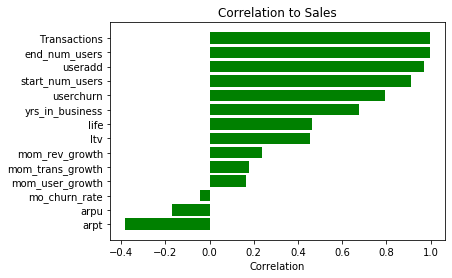

In [32]:
names = X.columns
plt.title('Correlation to Sales')
plt.barh(range(len(indices)), importances[indices], color = 'g', align = 'center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Correlation')
plt.show()

In [33]:
from sklearn.feature_selection import mutual_info_regression
mi = pd.Series(mutual_info_regression(X,y))
mi.index = X.columns
mi.sort_values(ascending = False)

end_num_users       1.232673
Transactions        1.224896
useradd             0.880451
start_num_users     0.644261
userchurn           0.429499
mom_rev_growth      0.212120
yrs_in_business     0.120928
life                0.120797
mom_user_growth     0.093945
mo_churn_rate       0.064260
ltv                 0.002064
mom_trans_growth    0.000000
arpt                0.000000
arpu                0.000000
dtype: float64

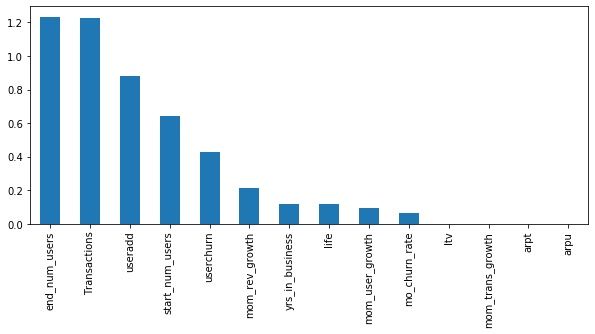

In [34]:
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [35]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = df.iloc[:,1]
train_dataset['y']=y
train_dataset.head()

,ds,y
74,2017-07-01,16768
75,2017-08-01,15735
76,2017-09-01,16048
77,2017-10-01,18946
78,2017-11-01,19536


In [36]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future= prophet_basic.make_future_dataframe(periods=16, freq = 'm')
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


,ds
26,2019-08-31
27,2019-09-30
28,2019-10-31
29,2019-11-30
30,2019-12-31


In [37]:
forecast = prophet_basic.predict(future)

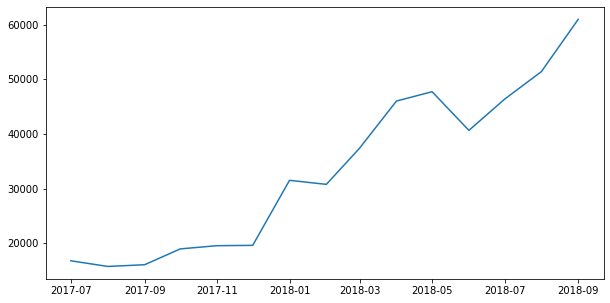

In [38]:
#Actual Sales
fig= plt.figure(figsize=(10,5))
plt.plot(df['Month'],df['Sales'])

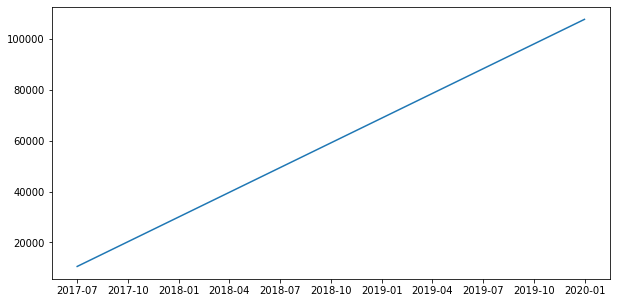

In [39]:
#Forecasted Sales
fig= plt.figure(figsize=(10,5))
plt.plot(forecast['ds'],forecast['yhat'])

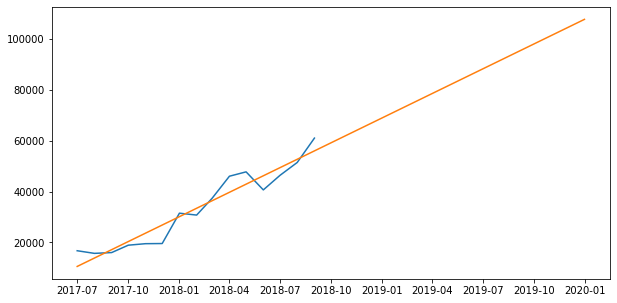

In [40]:
fig= plt.figure(figsize=(10,5))
plt.plot(df['Month'],df['Sales'])
plt.plot(forecast['ds'],forecast['yhat'])
plt.show()

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-01,10602.911533,5617.999510,15676.841418,10602.911533,10602.911533,0.0,0.0,0.0,0.0,0.0,0.0,10602.911533
1,2017-08-01,13895.031236,8616.495058,18957.666494,13895.031236,13895.031236,0.0,0.0,0.0,0.0,0.0,0.0,13895.031236
2,2017-09-01,17187.150943,12083.710139,22680.404115,17187.150943,17187.150943,0.0,0.0,0.0,0.0,0.0,0.0,17187.150943
3,2017-10-01,20373.073239,15075.221429,25903.037216,20373.073239,20373.073239,0.0,0.0,0.0,0.0,0.0,0.0,20373.073239
4,2017-11-01,23665.192956,18045.878145,28521.840013,23665.192956,23665.192956,0.0,0.0,0.0,0.0,0.0,0.0,23665.192956
5,2017-12-01,26851.438432,21595.752380,32276.045562,26851.438432,26851.438432,0.0,0.0,0.0,0.0,0.0,0.0,26851.438432
6,2018-01-01,30143.892095,24662.401747,35374.743712,30143.892095,30143.892095,0.0,0.0,0.0,0.0,0.0,0.0,30143.892095
7,2018-02-01,33436.345758,28446.665682,39149.163211,33436.345758,33436.345758,0.0,0.0,0.0,0.0,0.0,0.0,33436.345758
8,2018-03-01,36410.174872,31131.338264,41662.382898,36410.174872,36410.174872,0.0,0.0,0.0,0.0,0.0,0.0,36410.174872
9,2018-04-01,39702.628538,34520.182618,44915.510822,39702.628538,39702.628538,0.0,0.0,0.0,0.0,0.0,0.0,39702.628538


In [42]:
#YoY Growth
94612.259057/55952.480509-1

0.6909394935901285

In [43]:
#MoM Growth
(forecast.iloc[14:30,1:2]/forecast.iloc[14:30,1:2].shift(1) -1).mean()

trend    0.042405
dtype: float64

ds
2017    1.125748e+05
2018    6.424157e+05
2019    1.076614e+06
Name: yhat, dtype: float64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

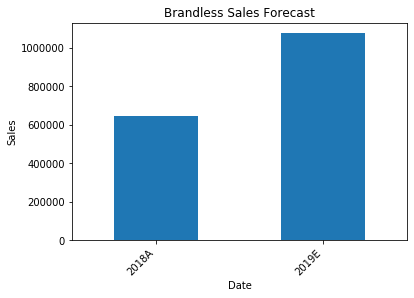

In [44]:
print(forecast.groupby(forecast.ds.dt.year).yhat.sum())
p = forecast.groupby(forecast.ds.dt.year).yhat.sum()
p = p[1:]
p.index = ['2018A', '2019E']
p.plot.bar()
plt.title('Brandless Sales Forecast')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')

In [45]:
forecast.groupby(forecast.ds.dt.year).yhat.sum()/forecast.groupby(forecast.ds.dt.year).yhat.sum().shift(1)-1

ds
2017         NaN
2018    4.706568
2019    0.675884
Name: yhat, dtype: float64

<Figure size 720x720 with 0 Axes>

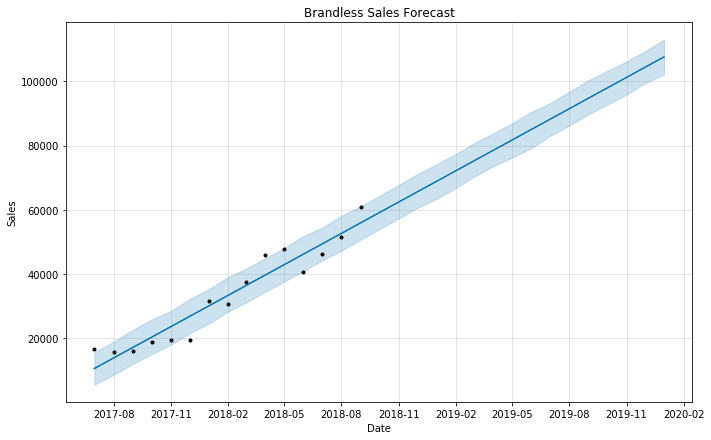

In [46]:
plt.figure(figsize=(10,10))
prophet_basic.plot(forecast)
plt.title('Brandless Sales Forecast')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.savefig('forecast.png')

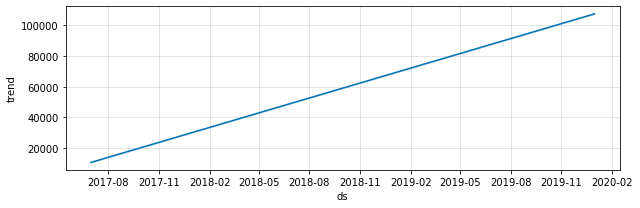

In [47]:
# to view  the forecast components
fig1 = prophet_basic.plot_components(forecast)

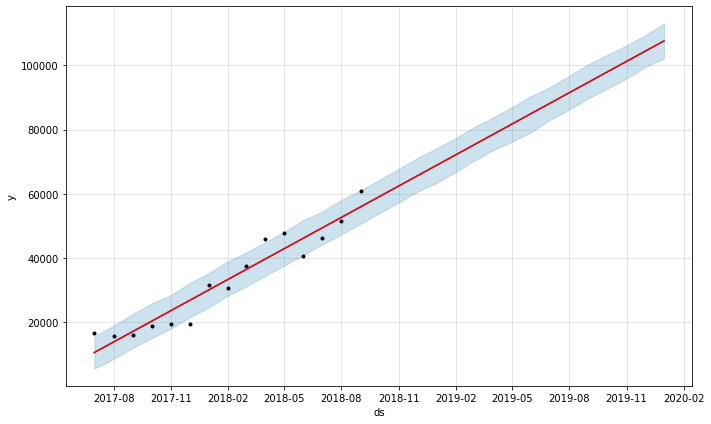

In [48]:
#Change points
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

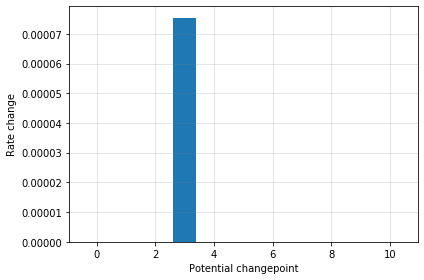

In [49]:
deltas = prophet_basic.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\mjdch\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

INFO:fbprophet:n_changepoints greater than number of observations.Using 13.


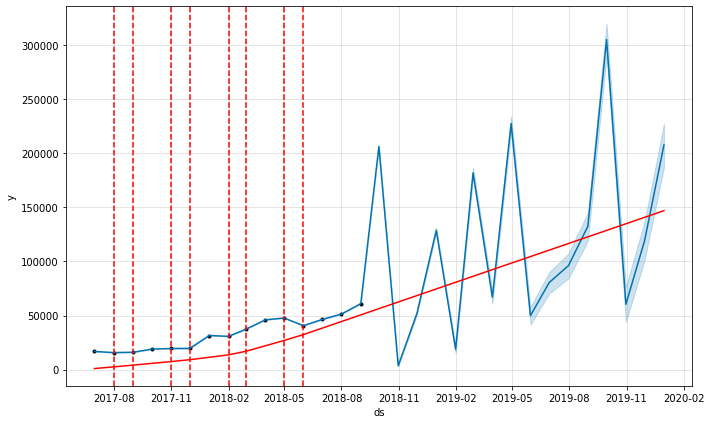

In [50]:
pro_change= Prophet(changepoint_range=0.95, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\mjdch\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


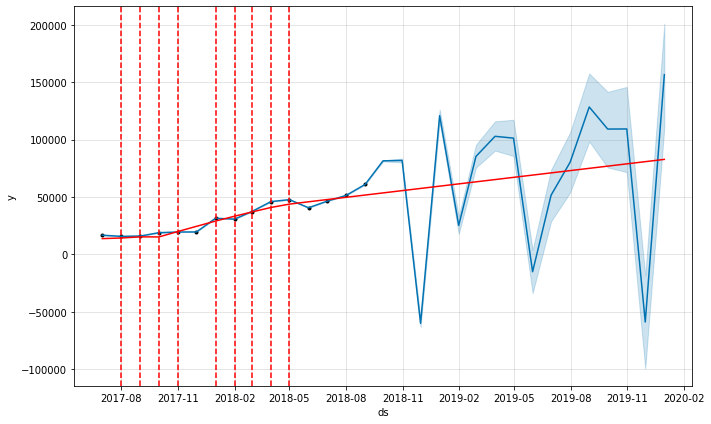

In [51]:

pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\mjdch\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


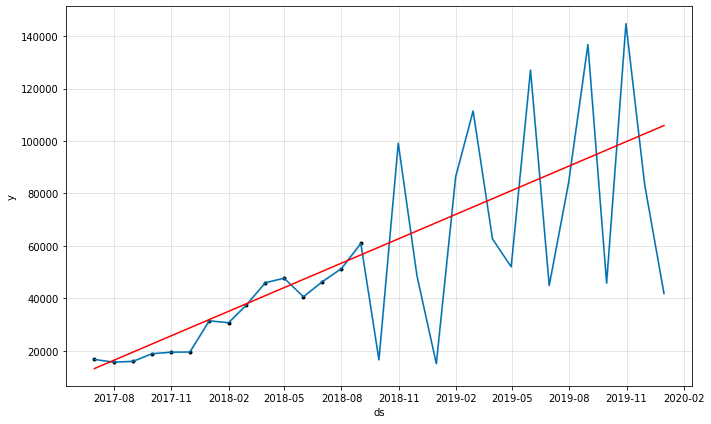

In [52]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\mjdch\Anaconda3\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


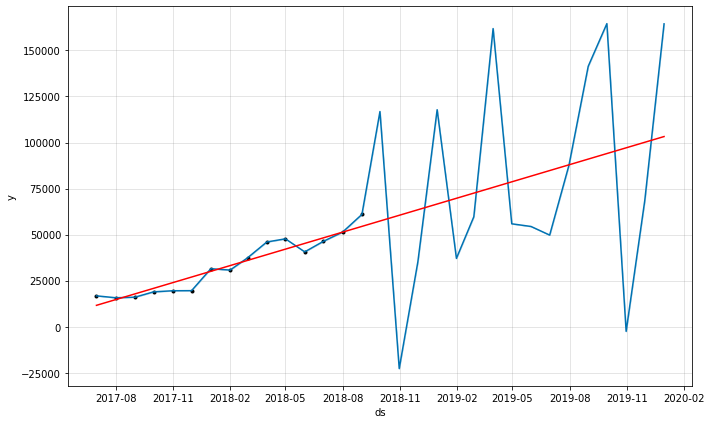

In [53]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


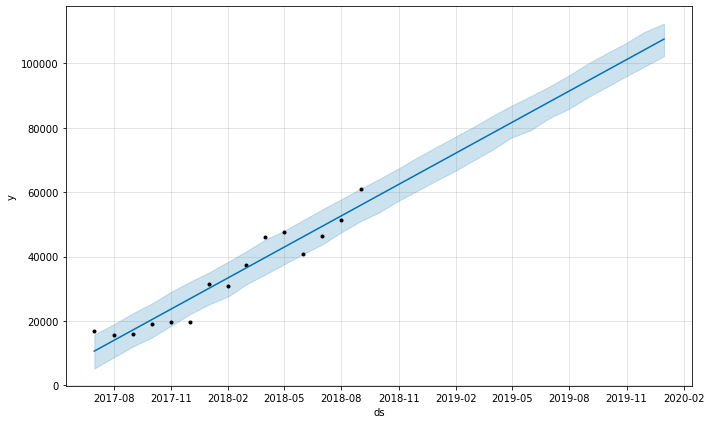

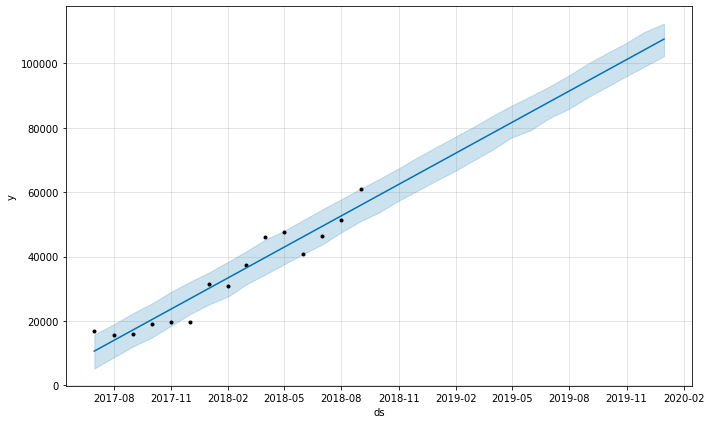

In [54]:
pro1 = Prophet(changepoints=['2017-08-01', '2018-02-01', '2018-06-01'])
forecast = pro1.fit(train_dataset).predict(future)
pro1.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


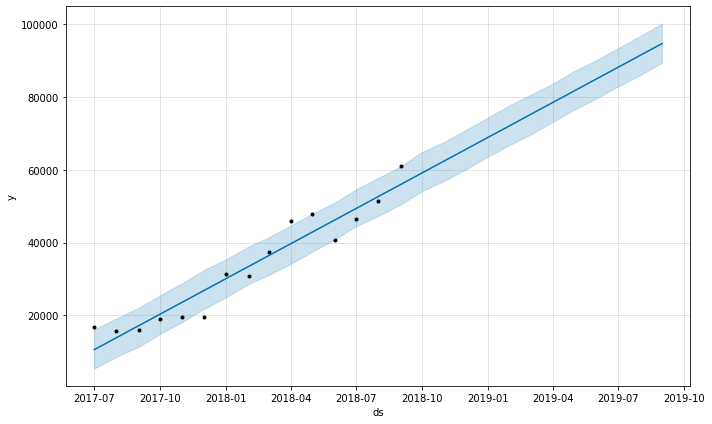

In [55]:
#create 12 months of future data
pro1= Prophet()
pro1.fit(train_dataset)
future_data = pro1.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro1.predict(future_data)
pro1.plot(forecast_data)
plt.savefig('forecast.png')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


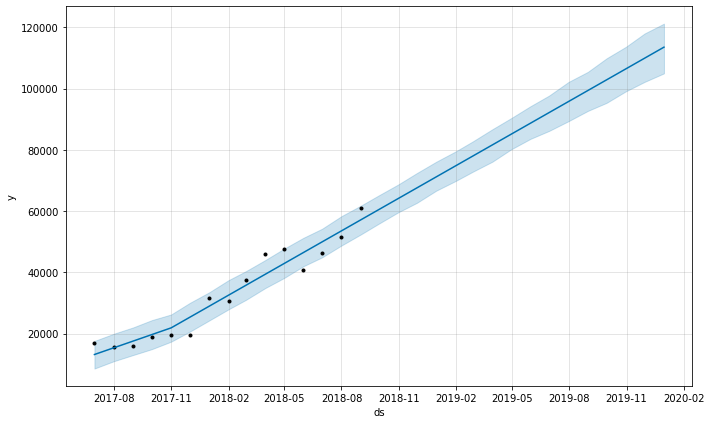

In [56]:
pro_trend = Prophet(changepoint_prior_scale=0.25)
forecast = pro_trend.fit(train_dataset).predict(future)
fig = pro_trend.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


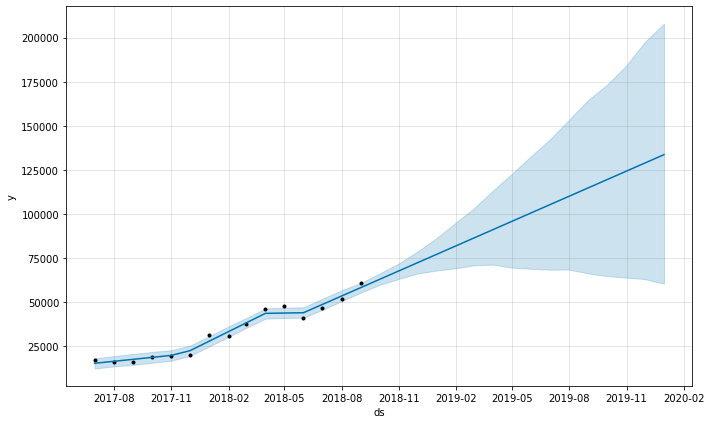

In [57]:
pro_trend = Prophet(changepoint_prior_scale=0.5)
forecast = pro_trend.fit(train_dataset).predict(future)
fig = pro_trend.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.


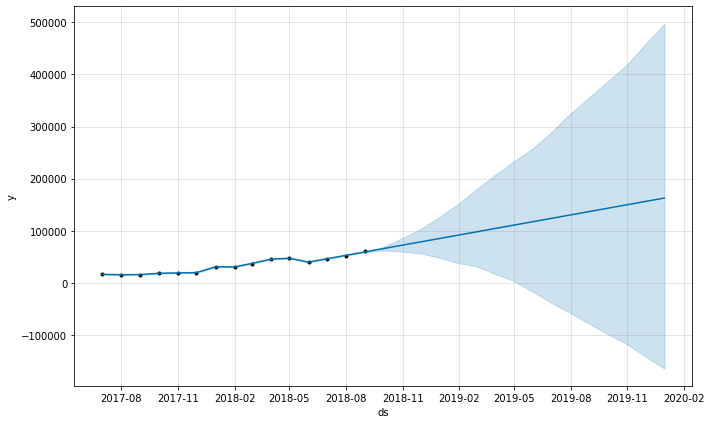

In [58]:
pro_trend = Prophet(changepoint_prior_scale=0.75)
forecast = pro_trend.fit(train_dataset).predict(future)
fig = pro_trend.plot(forecast)

In [59]:
train_dataset['end_num_users'] = X['end_num_users']
train_dataset['Transactions'] = X['Transactions']
train_dataset['arpu'] = X['arpu']
train_dataset['arpt'] = X['arpt']
train_dataset['mom_rev_growth'] = X['mom_rev_growth']
train_dataset['mom_user_growth'] = X['mom_user_growth']
train_dataset['mom_trans_growth'] = X['mom_trans_growth']
train_dataset['yrs_in_business'] = X['yrs_in_business']
train_dataset['useradd'] = X['useradd']
train_dataset['userchurn'] = X['userchurn']
train_dataset['start_num_users'] = X['start_num_users']
train_dataset['mo_churn_rate'] = X['mo_churn_rate']
train_dataset['life'] = X['life']
train_dataset['ltv'] = X['ltv']

In [60]:
train_X = train_dataset[:int(len(train_dataset)*(2/3))]
test_X = train_dataset[int(len(train_dataset)*(2/3)):int(len(train_dataset))]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


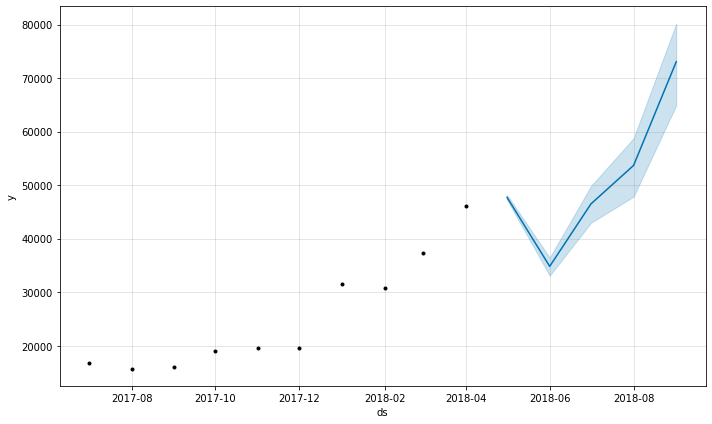

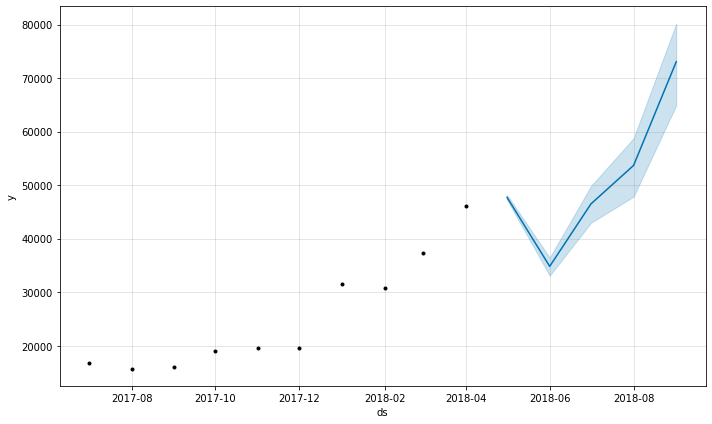

In [61]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('end_num_users')
pro_regressor.add_regressor('Transactions')
pro_regressor.add_regressor('arpu')
pro_regressor.add_regressor('arpt')
pro_regressor.add_regressor('mom_rev_growth')
pro_regressor.add_regressor('mom_user_growth')
pro_regressor.add_regressor('mom_trans_growth')
pro_regressor.add_regressor('yrs_in_business')
pro_regressor.add_regressor('useradd')
pro_regressor.add_regressor('userchurn')
pro_regressor.add_regressor('start_num_users')
pro_regressor.add_regressor('mo_churn_rate')
pro_regressor.add_regressor('life')
pro_regressor.add_regressor('ltv')

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=700)


#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data)

What additional pieces of data/information would you want and what other analyses would you perform to
make a higher conviction assessment?

The dataset is biased in that all the companies have been successful (survivorship bias). It would be interesting to study relative companies that have not done so well to understand what went wrong and also get a better gauge of the probability of success. 

In addition to this study of user data, we can study other types of data:
  - Gross margins
  - company culture (via Glassdoor ratings and reviews) 
  - employee growth/job openings (attractiveness of the firm via Linkedin)
  - social media following (via Facebook, IG, Tiktok, Twitter, etc.)
  - product reviews (via cold calling, websites)
  - website traction (via Similar Web, google trends) 
  